In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<h3> № 11.1

In [2]:
'''
T- total time, N - number of steps 
'''
def wiener_process(T, N):
    
    W0 = [0]
    dt = T/N
    incr = stats.norm.rvs(loc=0, scale=np.sqrt(dt), size=N)
    W = W0 + list(np.cumsum(incr))
    
    return W

In [3]:
def wiener_plot(T, N, processes):
    
    domain = np.linspace(0, T, N+1)
    fig, ax = plt.subplots(figsize=(20, 10))
    for i in range(processes):
        ax.plot(domain, wiener_process(T, N))
    ax.set_xlabel('time')
    ax.set_ylabel('W')
    ax.set_title('{} wiener processes'.format(processes))
    
    plt.show()

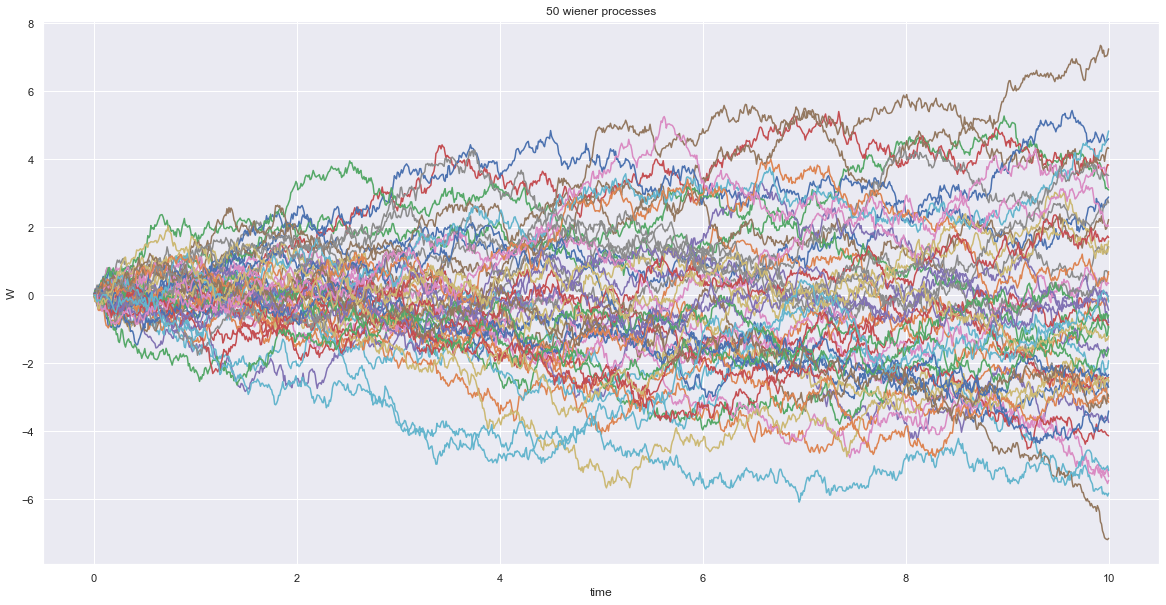

In [4]:
wiener_plot(10, 1000, 50)

<h3> №11.3

In [25]:
def brownian_too(T, N):
    
    dt = T/N
    U = wiener_process(T, N)
    V = wiener_process(T, N)
    New = list()
    
    for t in np.arange(0, T+dt, dt):
        if t < 1:
            New.append(U[int(t/dt)])
        elif t >= 1:
            New.append(U[int(t/dt)] + t*V[int(1/(t*dt))] - V[int(1/dt)])
            
    domain = np.linspace(0, T, N+1)
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(domain, U, label='$U(t)$')
    ax.plot(domain, V, label='$V(t)$')
    ax.plot(domain, New, label='$U(t) + tV(1/t) - V(1)$')
    ax.set_xlabel('time')
    ax.set_ylabel('W')
    ax.legend()
    
    plt.show()

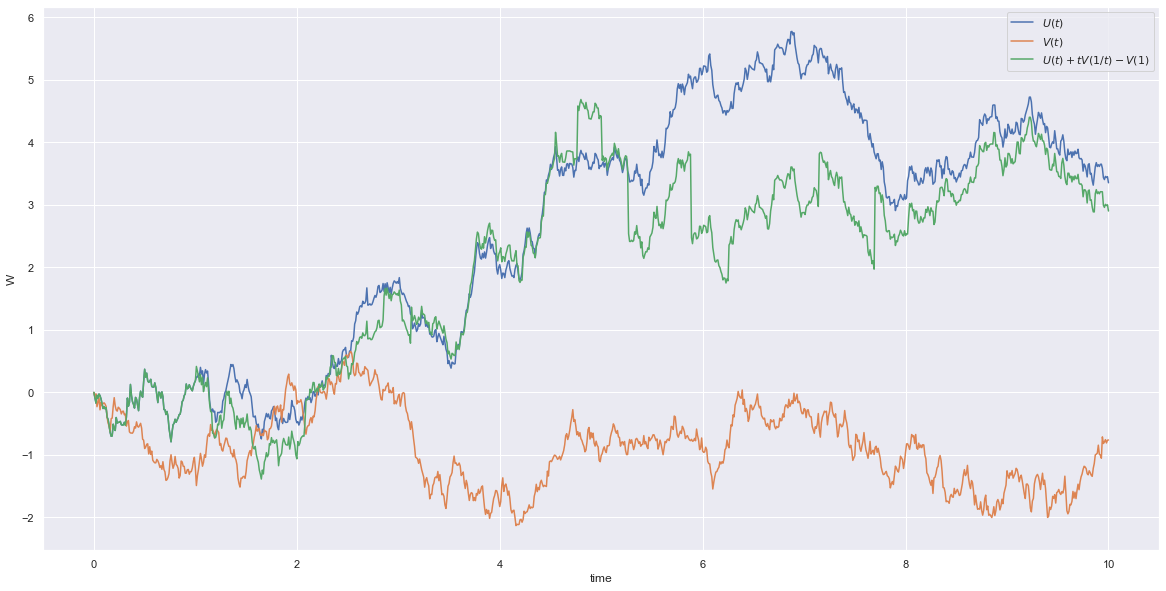

In [28]:
brownian_too(10, 1000)

<h3> №11.2

In [32]:
def non_zero_wiener(T, N, it, a, b):
    dt = T/N
    prob = list()
    for i in range(it):
        W = wiener_process(T, N)
        k = 0
        for j in range(int(a/dt), int(b/dt)+1):
            if W[j] != 0: 
                k += 1
        prob.append(k/len(range(int(a/dt), int(b/dt)+1)))
        
    return prob